<h1>Baseline Models</h1>

<h2>Load Processed Data</h2>

In [2]:
import pandas as pd

# load data
df = pd.read_csv('../../data/processed/telco_churn_clean.csv')

# check if data is correct
df.head() # no ID column
df.isnull().sum() # no missing values
df['Churn'].value_counts() # 'Churn' is binary of type int64
df.tail()
len(df.columns)

20

<h2>Encode Categorical Columns</h2>

In [3]:
# encoding
categorical_cols = df.select_dtypes(include='object').columns 
for c in categorical_cols:

    # encoding
    hot_encoded_c = pd.get_dummies(df[c])
    new_categories = hot_encoded_c.columns

    # new categories for df
    new_categories_distinct = [ f"{new_c} ({c})" for new_c in new_categories]
    #print(new_categories)
    hot_encoded_c.columns = new_categories_distinct
    #print(hot_encoded_c.columns)

    # creating the new categories
    df[new_categories_distinct] = hot_encoded_c
    df = df.drop(columns=[c])

len(df.columns)
df.tail()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Female (gender),Male (gender),No (Partner),Yes (Partner),No (Dependents),...,Yes (StreamingMovies),Month-to-month (Contract),One year (Contract),Two year (Contract),No (PaperlessBilling),Yes (PaperlessBilling),Bank transfer (automatic) (PaymentMethod),Credit card (automatic) (PaymentMethod),Electronic check (PaymentMethod),Mailed check (PaymentMethod)
7027,0,24,84.80,1990.50,0,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7028,0,72,103.20,7362.90,0,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7029,0,11,29.60,346.45,0,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7030,1,4,74.40,306.60,1,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True
7031,0,66,105.65,6844.50,0,False,True,True,False,True,...,True,False,False,True,False,True,True,False,False,False


<h2>Train Test Split</h2>

In [4]:
# features and target 'Churn'
X = df.drop('Churn', axis=1)
y = df['Churn']

In [5]:
from sklearn.model_selection import train_test_split

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Logisitic Regression</h2>

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# training model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

# model evaluation
y_preds = model1.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(classification_report(y_test, y_preds))

Accuracy: 0.7853589196872779
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h2>Day 4 Conclusions</h2>
<ol>
    <li>The Churn "Yes" class has a worse recall than the "No" class.</li>
    <li>Based on the prescison, recall, and F1-score for each class, the Logistic Model is better at predicting when customer has not churned.</li>
    <li>I would say that missing when a customer churns is more problematic, because that means we are not detecting a loss of revenue.</li>
    <li>Thus false negatives are worse for the model and why recall is more important than accuracy.</li>
</ol>

<h2>Day 5</h2>

<h3>Basline Logistic Regression Confusion Matrix</h3>

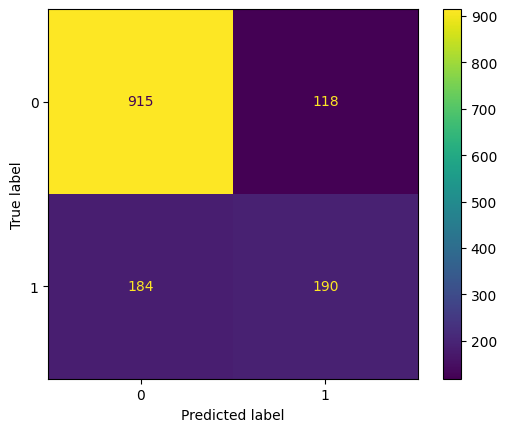

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()

<h3>Obervations</h3>
<ul>
    <li>Data is imbalanced, thus looking the accuracy is can be missleading.</li>
    <li>There is a alot of false negatives for prediciting about equal to the true negatives. Thus the recall for churn is about 50%.</li>
    <li>For a real company, this baseline logistic regression model is not doing a good job of identifying when customers churn.</li>
</ul>

<h2>Data Imbalance</h2>
<ul>
    <li>Data Imbalance is when one class is overwhelmingly represented compared to the other class.</li>
    <li>In this dataset, there is a lot more non-churned customers than churned.</li>
    <li>This is the case because most customers in relaity tend not to churn, thus creating this inequality of the class representation in the data.</li>
    <li>Baseline models bias towards the majority since they try to minize overall error, where majority will be favored in this case.</li>
    <li>The reason why the baseline logistic regression model suffers from the class imbalance is the decision bounrday favors majority of the data. Thus the churn class will have less influence on the loss function because it is dominated by the non-churn class.</li>
</ul>

<h2>Logistic Regression with Class Weights</h2>
<h3>Why?</h3>
<ul>
    <li>I choose this model since it addresses the problem of data imbalance directly. Class weights make the logistic regression increases the penaltyfor misclassifying the minority class to increase the chance of identifying the minority which is churn-customers.</li>
    <li>This will improve the recall in my opinion, since it the false negatives would then be reduced, because the model is more keen to predict the minority class with the bias.</li>
    <li>How this could lead to more false positives for churn since bias causes more churn-customers to be predicted.</li>
</ul>
<h3>Expected Strengths</h3>
<ol>
    <li>Improved recall for the churn class without changing the feature space.</li>
    <li>Minimal increase in model complexity compared to the baseline.</li>
    <li>Maintains interpretability, which is important for business insights.</li>
</ol>
<h3>Expected Weaknesses</h3>
<ol>
    <li>Higher false positive rate for churn predictions.</li>
    <li>Overall accuracy may decrease as the model prioritizes recall over correctness on the majority class.</li>
    <li>Still limited by the linear decision boundary of logistic regression.</li>
</ol>

Accuracy: 0.7377398720682303
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


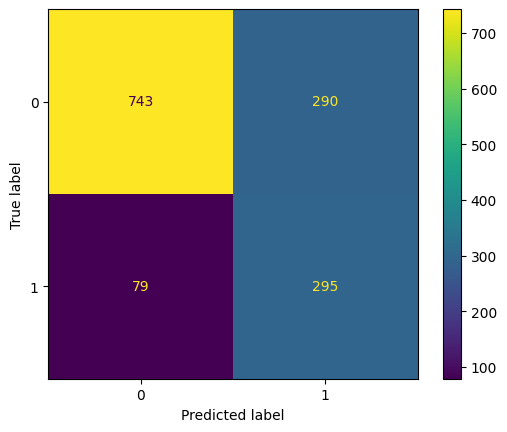

In [15]:
# training
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train, y_train)

# evaluation and metrics
y_preds = model2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(classification_report(y_test, y_preds))
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()

<h2>Model Comparison Table</h2>

| Model                               | Accuracy | Recall (Churn) | Precision (Churn) | F1-score (Churn) | Notes                                      |
|------------------------------------|----------|----------------|-------------------|------------------|--------------------------------------------|
| Logistic Regression (Baseline)     | 0.79     | 0.51           | 0.62              | 0.56             | Baseline model                             |
| Logistic Regression (Class Weights)| 0.74     | 0.79           | 0.50              | 0.62             | Improved recall & F1; lower accuracy & precision |


<h2>Day 5 Conclusions</h2>
<ul>
    <li>The baseline logistic regression model achieved reasonable overall accuracy but performed poorly at identifying churned customers due to class imbalance in the dataset.</li>
    <li>By introducing class weights, the model significantly improved recall for the churn class, increasing its ability to correctly identify customers who are likely to churn.</li>
    <li>This improvement came at the cost of lower overall accuracy and precision, indicating an increase in false positive churn predictions.</li>
    <li>For a real-world churn prediction problem, this tradeoff is acceptable, as failing to detect churned customers is more costly than incorrectly flagging some customers as at risk.</li>
    <li>Addressing class imbalance directly proved to be an effective first step toward building a more business-relevant churn prediction model.</li>
</ul>